# Simulations du signal initial idéal

## Table des matières 
+ [Fonction de Transfert](#fonction-de-transfert)
    + [imports](#imports)
    + [Définition de la fonction de transfert](#définition-de-la-fonction-de-transfert)

## Fonction de Transfert
Calcul de la fonction de transfert et affichage des lieu de Bodes
### imports
Import des package néecessaires

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Définition de la fonction de transfert
On définit une fonction permettant de tracer la fonction de transfert à partir d'un échantillon dans le temps. La formule utilisée est la suivante :

$$ H(j\omega) = \frac{1}{1+jQ(x-1/x)}  $$

où $x=\omega / \omega_0$. On utilise la précision machine de 1e-16 pour éviter les divisions par 0

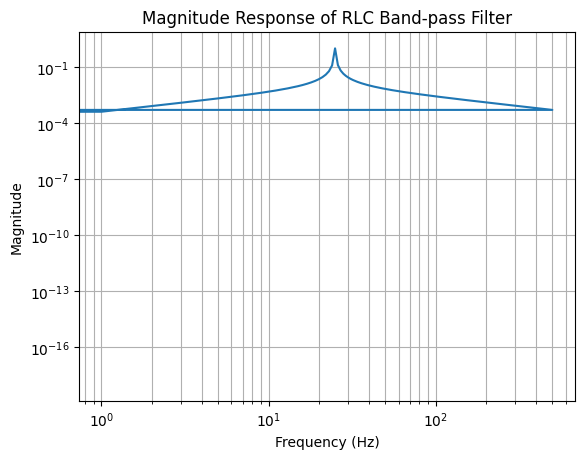

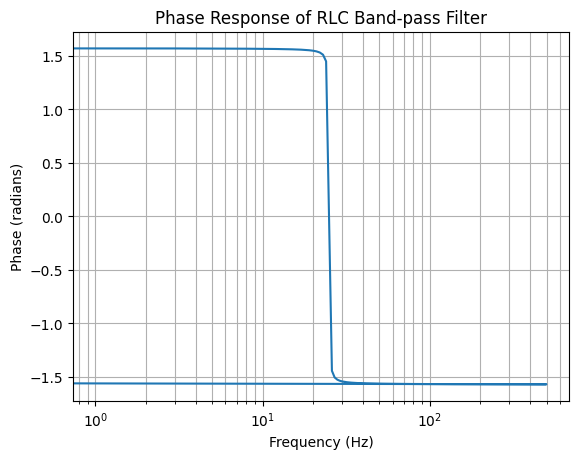

In [16]:
# Define the transfer function in terms of the central frequency and quality factor
def transfer_function(f, f0, Q):
    w0 = 2 * np.pi * f0
    w = 2 * np.pi * f
    x= w/w0
    return 1/(1+1.j*Q*(x-1/(x+1e-16)))

N = 1000 # number of points

t = np.linspace(0, 1, N, endpoint=False) # Definition of time vector
frequencies = np.fft.fftfreq(len(t), d=t[1]-t[0]) # Definition of associated frequencies vector

# Parameters of transfer function
Q = 100
f0 = 25

TF_values = transfer_function(frequencies, f0, Q) # Calculation of trnasfert function (TF :TransferFunction)
transNorm = np.absolute(TF_values)
transAngle = np.angle(TF_values)



# Plot the Bode diagrams
plt.figure()
plt.loglog(frequencies, transNorm)
plt.xscale('log')
plt.yscale('log')
plt.title('Magnitude Response of RLC Band-pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(which='both', axis='both')

plt.figure()
plt.semilogx(frequencies, transAngle)
plt.xscale('log')
plt.title('Phase Response of RLC Band-pass Filter' )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(which='both', axis='both')
plt.show()

## Signaux d'entrée et de sortie
On définit un signal d'entrée arbitraire. Ensuite, on le transforme dans l'espace des fréquence et on le multiplie par la fonciton de transfert pour obtenir le signal de sortie

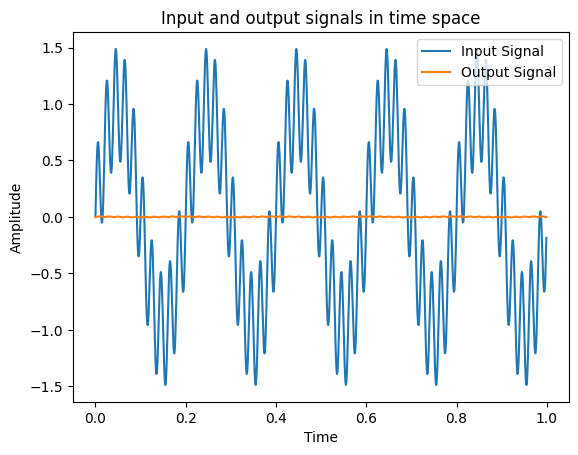

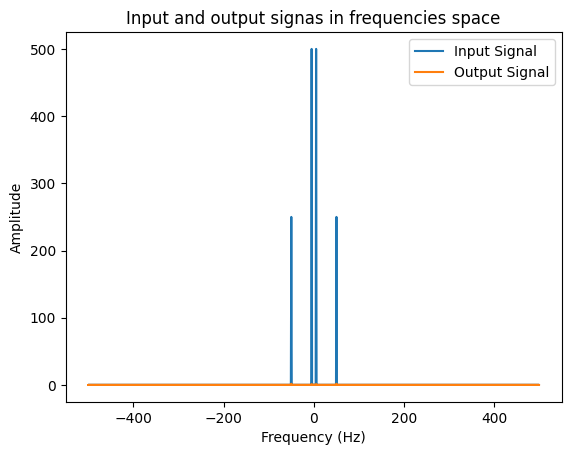

In [17]:
# Generate input signal
input_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)

# Apply the Fourier transform to the input signal
input_signal_freq = np.fft.fft(input_signal)

# Apply the transfer function to the input signal in the frequency domain
output_signal_freq = input_signal_freq * TF_values

# Convert the output signal back to the time domain
output_signal = np.real(np.fft.ifft(output_signal_freq))

# Plot the signals in time and frequencies spaces
# Time space
plt.figure()
plt.plot(t, input_signal, label='Input Signal')
plt.plot(t, output_signal, label='Output Signal')
plt.title('Input and output signals in time space')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
# Frequencies space
plt.figure()
plt.plot(frequencies, np.absolute(input_signal_freq), label='Input Signal')
plt.plot(frequencies, np.absolute(output_signal_freq),label='Output Signal')
plt.title('Input and output signas in frequencies space')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.show()


## Simulation de la fonction de transfert
On essaie de regénérer la fonction de transfert à partir des signaux d'entrées et de sorties dans l'espace des fréquences en sachant que 

$$ \overline{V}_s(\omega) = H(\omega)\overline{V}_i(\omega) $$

on peut alors en déduire

$$ H(\omega) = \frac{\overline{V}_s(\omega)}{\overline{V}_i(\omega)} $$

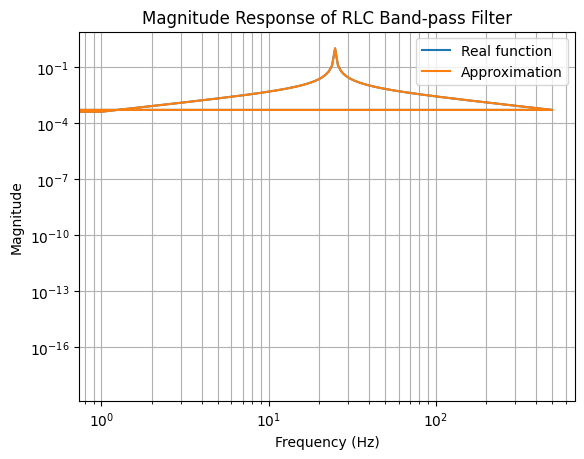

In [18]:
TF_approx = output_signal_freq/input_signal_freq # Transfer function approximation

TF_approx_norm = np.absolute(TF_approx)
TF_approx_angle = np.angle(TF_approx)

# Plot transfer function norm and its approximation
plt.figure()
plt.loglog(frequencies, transNorm, label = 'Real function')
plt.loglog(frequencies, TF_approx_norm, label = 'Approximation')
plt.xscale('log')
plt.yscale('log')
plt.title('Magnitude Response of RLC Band-pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(which='both', axis='both')
